In [8]:
from keras.src.models import Sequential
from keras.src.layers import Dense, Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
iris = pd.read_csv('./datasets/iris.data.txt', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


One-hot-enkoodataan 'species'-sarake.

In [10]:
iris = pd.get_dummies(iris, columns=['species'], dtype=int)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


Muutetaan DataFrame NumPy-taulukoksi ja sekoitetaan data.

In [11]:
iris = iris.to_numpy()
np.random.shuffle(iris)

X = iris[:, :4]
y = iris[:, 4:]

print("Input data shape: ", X.shape)
print("Output data shape: ", y.shape)

Input data shape:  (150, 4)
Output data shape:  (150, 3)


In [12]:
model = Sequential([
    Input(shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Muistetaan validation split, jotta voimme seurata mallin suorituskykyä.

In [14]:
history = model.fit(X, y, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3337 - loss: 2.5554 - val_accuracy: 0.2000 - val_loss: 2.4559
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3690 - loss: 1.9478 - val_accuracy: 0.1667 - val_loss: 2.0272
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3359 - loss: 1.6902 - val_accuracy: 0.1667 - val_loss: 1.7242
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1946 - loss: 1.5154 - val_accuracy: 0.1000 - val_loss: 1.5122
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1962 - loss: 1.2934 - val_accuracy: 0.1333 - val_loss: 1.3694
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1567 - loss: 1.2518 - val_accuracy: 0.1000 - val_loss: 1.2653
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1346 - loss: 1.2146 - val_accuracy: 0.1000 - val_loss: 1.1944
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1351 - loss: 1.1680 - val_accuracy: 0.1333 - val_loss

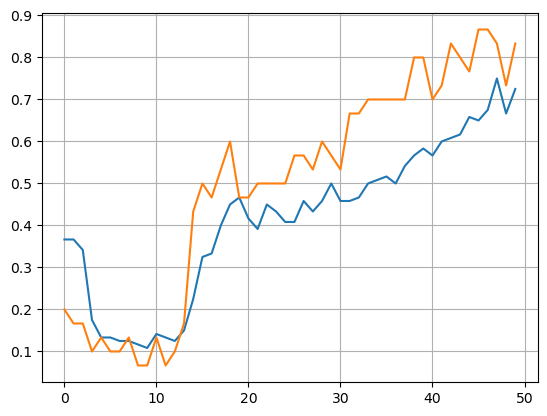

Test accuracy:  0.7250000238418579
Validation accuracy:  0.8333333134651184


In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.grid()
plt.show()

print ("Test accuracy: ", history.history["accuracy"][-1])
print ("Validation accuracy: ", history.history["val_accuracy"][-1])